In [31]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_data_validation as tfdv
from keras.models import Sequential
from keras import layers


import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.

# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Import LinearRegression function from sklearn.model_selection
from sklearn.linear_model import LinearRegression
# Importing metrics from sklearn
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

# Used to calculate stats such as Z score, standard deviation etc.
from scipy import stats


READ THE DATA INTO PANDAS DATAFRAME

In [160]:
df= pd.read_csv('melb_house_price.csv')
df.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


In [163]:
df['Date'] = pd.to_datetime(df['Date'])

/home/khaled/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/05/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/khaled/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/khaled/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/khaled/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/04/2018' in DD/MM/YYYY format. Prov

In [18]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [58]:
df = df.dropna(how='any',axis=0)
df.isnull().sum()


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


In [60]:

df =df[['Price','Distance','Rooms','Type','Method','Postcode']]
cat_features = ['Type','Method','Postcode']

dummy = df.copy()
dummy.head()
for i in cat_features:
 dummy = pd.get_dummies(df[i], prefix=i)
 df = pd.merge(left=df,right=dummy,left_index=True,right_index=True,)
df.head(20)





,Price,Distance,Rooms,Type,Method,Postcode,Type_h,Type_t,Type_u,Method_PI,...,Postcode_3807,Postcode_3808,Postcode_3809,Postcode_3810,Postcode_3910,Postcode_3975,Postcode_3976,Postcode_3977,Postcode_3978,Postcode_3980
0,1490000.0,3.0,3,h,S,3067,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1220000.0,3.0,3,h,S,3067,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1420000.0,3.0,3,h,S,3067,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1515000.0,7.5,3,h,S,3040,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,670000.0,10.4,2,h,S,3042,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,530000.0,10.4,2,t,S,3042,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,540000.0,10.4,2,u,S,3042,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,715000.0,10.4,3,h,SP,3042,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1925000.0,3.0,3,h,S,3206,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,515000.0,10.5,3,u,S,3020,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Exploratory Data Analysis (EDA)

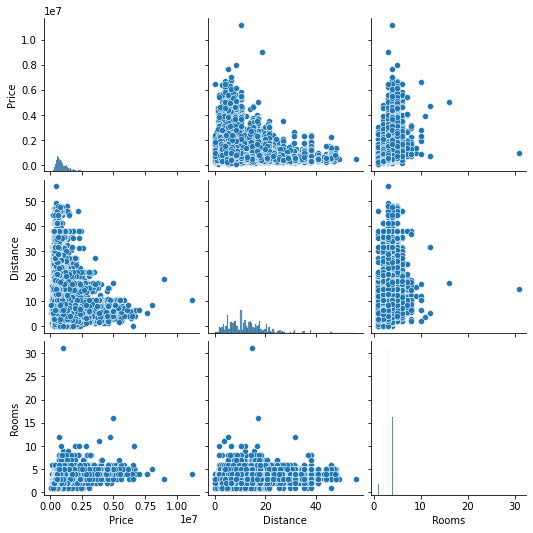

In [13]:
sns.pairplot(df[['Price','Distance','Rooms']])

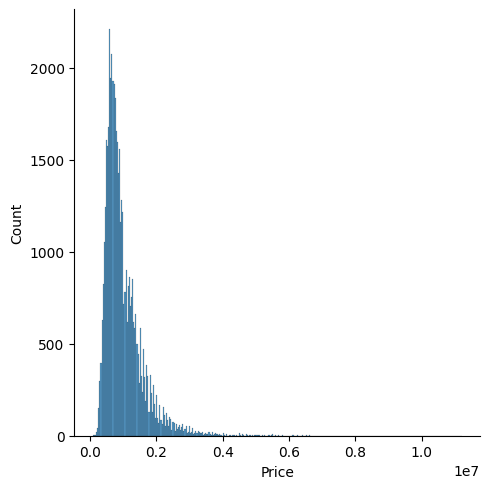

In [61]:
sns.displot(df['Price'])

In [62]:
df['Z'] = np.abs(stats.zscore(df['Price']))
df = df[df['Z'] < 1.8]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45945 entries, 0 to 63020
Columns: 236 entries, Price to Z
dtypes: float64(3), int64(2), object(2), uint8(229)
memory usage: 12.8+ MB


In [64]:
df.describe()

,Price,Distance,Rooms,Postcode,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,...,Postcode_3808,Postcode_3809,Postcode_3810,Postcode_3910,Postcode_3975,Postcode_3976,Postcode_3977,Postcode_3978,Postcode_3980,Z
count,4.594500e+04,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,...,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000,45945.000000
mean,9.008861e+05,12.948434,3.019697,3122.606595,0.691566,0.107193,0.201241,0.120231,0.636740,0.007640,...,0.000065,0.000109,0.000653,0.000675,0.000131,0.000414,0.001567,0.000065,0.000022,0.574630
std,3.901348e+05,7.613508,0.916209,128.349111,0.461852,0.309362,0.400932,0.325235,0.480944,0.087071,...,0.008080,0.010432,0.025545,0.025967,0.011427,0.020332,0.039556,0.008080,0.004665,0.358646
min,8.500000e+04,0.000000,1.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000171
25%,6.100000e+05,7.200000,2.000000,3047.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.299748
50%,8.050000e+05,12.000000,3.000000,3095.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.542722
75%,1.146000e+06,17.200000,4.000000,3163.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.803377
max,2.065000e+06,55.800000,31.000000,3980.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.798003


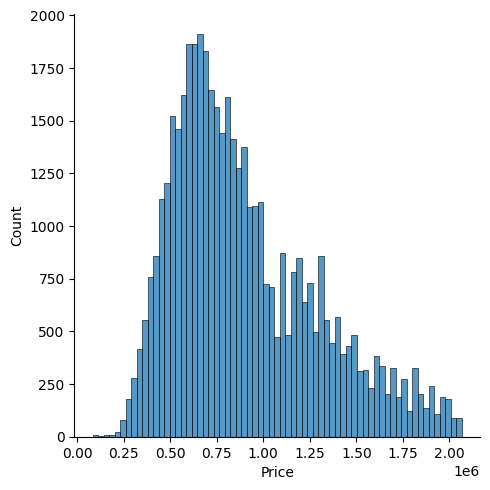

In [65]:
sns.displot(df['Price'])

<AxesSubplot:>

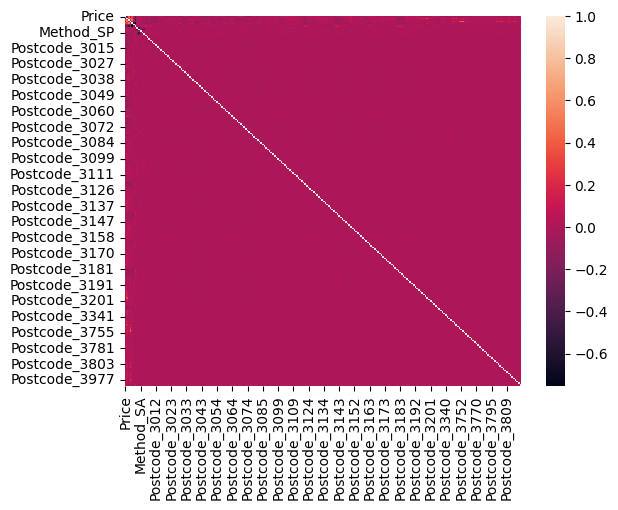

In [50]:
sns.heatmap(df.corr())

DATA SPLIT & LINEAR REGRESSION MODEL TRAINING USING SCIKIT LEARN

In [66]:
Y = df[['Price']]
df = df.drop(['Price','Type','Method','Postcode','Z'], axis = 1)


In [55]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44593 entries, 0 to 63020
Columns: 231 entries, Distance to Postcode_3980
dtypes: float64(1), int64(1), uint8(229)
memory usage: 11.8 MB


In [67]:
# Split up the data into a training & Test set
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=101)

In [68]:
X_train.astype("float32").to_numpy()
y_train.astype("float32").to_numpy()

array([[1702000.],
       [1200000.],
       [1412000.],
       ...,
       [1475000.],
       [ 795000.],
       [1115000.]], dtype=float32)

In [69]:
# LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets
# in the dataset, and the targets predicted by the linear approximation.
model = LinearRegression()

In [70]:
# Train the Linear Regression Classifer
model.fit(X_train,y_train)

LinearRegression()

In [71]:
# print the intercept
print(model.intercept_)

print(model.coef_)

[-4.74437808e+16]
[[ 5.99096097e+09  1.54436505e+05  5.18428993e+16  5.18428993e+16
   5.18428993e+16 -4.18147481e+15 -4.18147481e+15 -4.18147481e+15
  -4.18147481e+15 -4.18147481e+15 -2.17643688e+14 -2.17651477e+14
  -2.17662260e+14 -2.17647882e+14 -2.17652076e+14 -2.17674243e+14
  -2.17682031e+14 -2.17681432e+14 -2.17680833e+14 -2.17684427e+14
  -2.17709589e+14 -2.17695211e+14 -2.17706594e+14 -2.17727563e+14
  -2.17720373e+14 -2.17732355e+14 -2.17806643e+14 -2.17700004e+14
  -2.17749130e+14 -2.17736549e+14 -2.17753923e+14 -2.17731756e+14
  -2.17664058e+14 -2.17669450e+14 -2.17713783e+14 -2.17700603e+14
  -2.17730558e+14 -2.17751527e+14 -2.17736549e+14 -2.17680833e+14
  -2.17688621e+14 -2.17692815e+14 -2.17705995e+14 -2.17720973e+14
  -2.17694612e+14 -2.17710788e+14 -2.17727563e+14 -2.17747932e+14
  -2.17742540e+14 -2.17654472e+14 -2.17654472e+14 -2.17653274e+14
  -2.17664657e+14 -2.17674842e+14 -2.17674842e+14 -2.17667652e+14
  -2.17683828e+14 -2.17765905e+14 -2.17722171e+14 -2.17743

In [72]:
# Predict values based on linear model object.
predictions = model.predict(X_test)

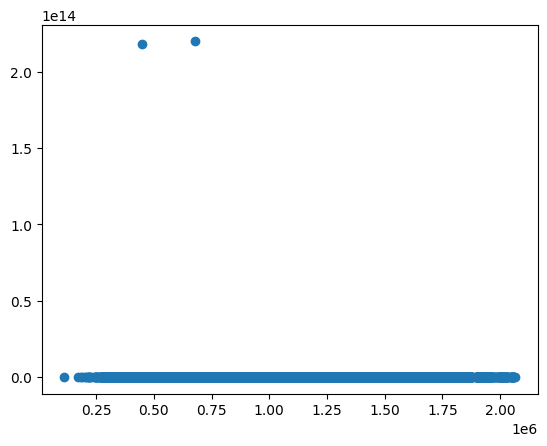

In [73]:
# Scatter plots are widely used to represent relation among variables and how change in one affects the other.
plt.scatter(y_test,predictions)

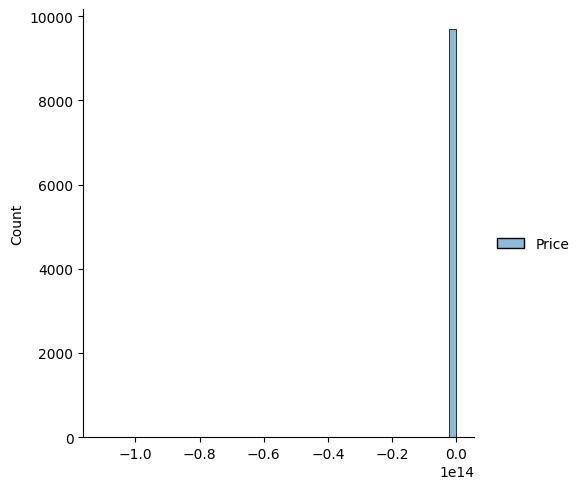

In [243]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence we choose one particular column of the dataset.
sns.displot((y_test-predictions),bins=50);

In [244]:
# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 11428520091.894705
MSE: 1.2651783922405685e+24
RMSE: 1124801490148.6255


Sequential DNN for Linear regression using Tensforflow

In [74]:
X = tf.convert_to_tensor(df)
Y = tf.convert_to_tensor(Y)
print(X.shape[1])

2022-07-13 07:20:02.656599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-13 07:20:02.664471: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-13 07:20:02.673647: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-MM57QPP): /proc/driver/nvidia/version does not exist
2022-07-13 07:20:02.795454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


231


In [113]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X)

seqDNNmodel = tf.keras.Sequential([
  #layers.InputLayer(input_shape=X_.shape[1],),
  normalizer,
  layers.Dense(256,activation='relu',name='HL1'),
  layers.Dense(128, activation='relu',name='HL2'),
  layers.Dense(1, activation='linear',name='Price')
])
seqDNNmodel.summary()
# Model compile
seqDNNmodel.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

# Model Fit
history = seqDNNmodel.fit(X,Y,batch_size = 32, epochs=120)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 231)              463       
 ion)                                                            
                                                                 
 HL1 (Dense)                 (None, 256)               59392     
                                                                 
 HL2 (Dense)                 (None, 128)               32896     
                                                                 
 Price (Dense)               (None, 1)                 129       
                                                                 
Total params: 92,880
Trainable params: 92,417
Non-trainable params: 463
_________________________________________________________________
Epoch 1/120
1436/1436 [==============================] - 11s 7ms/step - loss: 564787544064.0000 - mse: 56478754406

In [114]:
prediction = seqDNNmodel.predict(X)


1436/1436 [==============================] - 8s 5ms/step


In [149]:

print('Input is:')
df.iloc[[23]]


Input is:


,Distance,Rooms,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,...,Postcode_3807,Postcode_3808,Postcode_3809,Postcode_3810,Postcode_3910,Postcode_3975,Postcode_3976,Postcode_3977,Postcode_3978,Postcode_3980
27,21.5,4,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
print('Expected Output is:')
Expected = Y[100][0]
print(Expected.numpy())

Expected Output is:
406000.0


In [157]:
pred = prediction[100][0]
print('Prediction is:')
print(pred)

Prediction is:
375924.72


In [158]:

print('PREDICTION VS EXPECTED')
print((pred - Expected))

PREDICTION VS EXPECTED
tf.Tensor(-30075.28125, shape=(), dtype=float64)


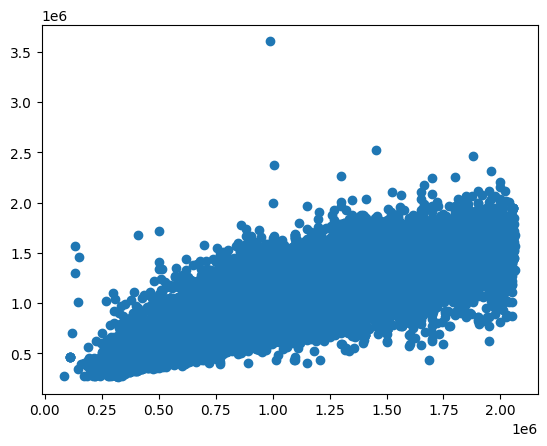

In [146]:
plt.scatter(Y,prediction)